In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors



import math
import numpy as np
import seaborn as sns

In [2]:

# 从文件中加载 JSON 数据
with open('../AllWindowData.json', 'r') as file:
    json_data = json.load(file)
# 选择 type=1 且 i=2 的元素
# for id in range(1,17):
#     for caseNum in range(1, 5):
#         meetingType = 2 if caseNum%2 == 0 else 1
#         environment = int((caseNum-1) / 2)
#         for window_mode in range(2):
#             selected1 = [element for element in json_data["windowDatas"] if element["userId"] == id and element["type"] == 0 and element["caseNum"] == caseNum and element['windowMode'] == window_mode][0]
#             selected2 = [element for element in json_data["windowDatas"] if element["userId"] == id and element["type"] == 1 and element["caseNum"] == caseNum and element['windowMode'] == window_mode][0]

In [3]:
# # 距離
# dis = []
# for id in range(1,17):
#     for caseNum in range(1, 5):
#         meetingType = 2 if caseNum%2 == 0 else 1
#         environment = int((caseNum-1) / 2)
#         for window_mode in ["Path anchor", "Head anchor"]:
#             selected1 = data[(data['id'] == id) & (data['type'] == 0) & (data['case'] == caseNum) & (data['Window Mode'] == window_mode)]
#             selected2 = data[(data['id'] == id) & (data['type'] == 1) & (data['case'] == caseNum) & (data['Window Mode'] == window_mode)]
#             # print(id, caseNum, window_mode)
#             dis.append(math.sqrt((selected1["theta"].iloc[0] - selected2["theta"].iloc[0])**2 + (selected1["phi"].iloc[0] - selected2["phi"].iloc[0])**2))
#             # print(selected1["theta"].iloc[0])
# # print(dis)
# # dff = pd.DataFrame({'distance': dis[0]})
# sns.kdeplot(dis, bw_adjust=0.5)
# plt.title('Kernel Density Estimation Plot')
# plt.xlabel('Values')
# plt.ylabel('Density')
# plt.show()
# # plt.title("Probability density of distance (Presentation, Window Mode)")

# # sns.kdeplot(dis, bw_adjust=0.5)

# # plt.xlabel('Distance')
# # plt.ylabel('Probability Density')

# plt.show()
# # plt.savefig('Results/distance_kde.png')

In [4]:
def cartesian_to_spherical(x, y, z):
    rho = math.sqrt(x**2 + y**2 + z**2)
    theta = math.atan2(y, x) # 經度
    phi = math.acos(z / rho) # 緯度
    # print(int(theta*100), int(phi*100))
    return theta, phi

In [5]:
# gradient color settings
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "#ffffff"],
          # [norm(-0.5), "#c4daee"],
          [norm( 0.0), "#5ea6d1"],
          # [norm( 0.5), "#2272b6"],
          [norm( 1.0), "#163b73"]]

blues = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

colors = [[norm(-1.0), "#ffffff"],
        #   [norm(-0.5), "#c4daee"],
          [norm( 0.0), "#66bd6f"],
        #   [norm( 0.5), "#2272b6"],
          [norm( 1.0), "#00441b"]]

greens = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

In [6]:
### 讀資料
heat=np.zeros((314, 314)) # Shared Screen
heat2=np.zeros((314, 314)) # Speaker's Video
f = open("../AllWindowData_normalized.json")
data = json.load(f)
theta = []
thetamm = []
thetamx = []
phi = []
phimm = []
phimx = []
for i in data["windowDatas"]:
    # find corners
    userId=i['userId']
    a=i['type']
    corners = i["corner"]
    case = i['caseNum']
    mode = i['windowMode']
    pos = i['position']
    if a == 0 : # Shared Screen
        theta_1, phi_1=cartesian_to_spherical (corners[0]['position'][0], corners[0]['position'][2], corners[0]['position'][1])
        theta_2, phi_2=cartesian_to_spherical (corners[1]['position'][0], corners[1]['position'][2], corners[1]['position'][1])
        theta_3, phi_3=cartesian_to_spherical (corners[2]['position'][0], corners[2]['position'][2], corners[2]['position'][1])
        theta_4, phi_4=cartesian_to_spherical (corners[3]['position'][0], corners[3]['position'][2], corners[3]['position'][1])
        phi_min=min(phi_1, phi_2, phi_3, phi_4)
        phi_max=max(phi_1, phi_2, phi_3, phi_4)
        theta_min=min(theta_1, theta_2, theta_3, theta_4)
        theta_max=max(theta_1, theta_2, theta_3, theta_4)
        """
        offset=0.2
        if(userId==6 and case==1 and mode==1):
            theta_min=theta_min+offset+0.1
            theta_max=theta_max+offset+0.1
        elif(userId==6 and case==1 and mode==0):
            theta_min=theta_min+offset
            theta_max=theta_max+offset
        elif(userId==2 and case==3 and mode==0):
            theta_min=theta_min+offset
            theta_max=theta_max+offset
        """
        for i in range(314):
            for j in range(314):
                if i < theta_max * 100 and i > theta_min * 100 and j < phi_max *100 and j > phi_min*100:
                    heat[j][i]+=1
    
    if a==1 and i['caseNum'] > 2: # Speaker's Video
        theta_1, phi_1=cartesian_to_spherical (corners[0]['position'][0], corners[0]['position'][2], corners[0]['position'][1])
        theta_2, phi_2=cartesian_to_spherical (corners[1]['position'][0], corners[1]['position'][2], corners[1]['position'][1])
        theta_3, phi_3=cartesian_to_spherical (corners[2]['position'][0], corners[2]['position'][2], corners[2]['position'][1])
        theta_4, phi_4=cartesian_to_spherical (corners[3]['position'][0], corners[3]['position'][2], corners[3]['position'][1])
        phi_min=min(phi_1, phi_2, phi_3, phi_4)
        phi_max=max(phi_1, phi_2, phi_3, phi_4)
        theta_min=min(theta_1, theta_2, theta_3, theta_4)
        theta_max=max(theta_1, theta_2, theta_3, theta_4)
        t, p = cartesian_to_spherical(pos[0], pos[2], pos[1])
        theta.append(t*100)
        phi.append(p*100)
        thetamm.append(theta_min)
        thetamx.append(theta_max)
        phimx.append(phi_max)
        phimm.append(phi_min)
        # print(theta_max, theta_min)
        """
        offset=0.2
        if(userId==6 and case==1 and mode==1):
            theta_min=theta_min+offset+0.1
            theta_max=theta_max+offset+0.1
        elif(userId==6 and case==1 and mode==0):
            theta_min=theta_min+offset
            theta_max=theta_max+offset
        elif(userId==2 and case==3 and mode==0):
            theta_min=theta_min+offset
            theta_max=theta_max+offset
        """
        for i in range(314):
            for j in range(314):
                if i < theta_max * 100 and i > theta_min * 100 and j < phi_max *100 and j > phi_min*100:
                    heat2[j][i]+=1

Text(0.5, 1.0, "The heatmap of Speaker's Video Relative Placement")

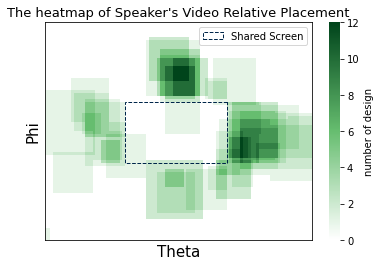

In [10]:
# for i in range(314):
#     for j in range(314):
#         if i < sum(thetamx)/len(theta)*100 and i > sum(thetamm)/len(theta)*100 and j < sum(phimx)/len(theta) *100 and j > sum(phimm)/len(theta)*100:
#             heat2[j][i]=50


green_dashcolor = '#002a11'
### 畫 Speaker's Video HeatMap
ax = sns.heatmap(heat2,xticklabels=False, yticklabels=False,cmap=greens,cbar_kws={'label':'number of design'})
for _, spine in ax.spines.items():
    spine.set_visible(True)
# 36 144
# 42 138
# plt.plot([36*math.pi/180*100, 144*math.pi/180*100], [42*math.pi/180*100, 42*math.pi/180*100], color=green_dashcolor, linestyle='--')
# plt.plot([36*math.pi/180*100, 144*math.pi/180*100], [138*math.pi/180*100, 138*math.pi/180*100], color=green_dashcolor, linestyle='--')
# plt.plot([36*math.pi/180*100, 36*math.pi/180*100], [42*math.pi/180*100, 138*math.pi/180*100], color=green_dashcolor, linestyle='--')
# plt.plot([144*math.pi/180*100, 144*math.pi/180*100], [42*math.pi/180*100, 138*math.pi/180*100], color=green_dashcolor, linestyle='--')

rect = matplotlib.patches.Rectangle((139, 147), 38, 21, linewidth=1, edgecolor='#00264a', linestyle='dashed', facecolor='none', label='Shared Screen')
ax.add_patch(rect)

# rect = matplotlib.patches.Rectangle((sum(thetamm)/len(theta)*100, sum(phimm)/len(theta)*100), 
#                                     sum(thetamx)/len(theta)*100-sum(thetamm)/len(theta)*100, 
#                                     sum(phimx)/len(theta)*100 - sum(phimm)/len(theta)*100, 
#                                     linewidth=2, edgecolor='red', linestyle='-', facecolor='none')
# ax.add_patch(rect)

plt.xlim(207,107) # 100 128 112 96
plt.ylim(194,120) # 84 72 63 54
# plt.scatter(sum(theta)/len(theta), sum(phi)/len(phi), marker='*', color='#00264a', s=210, label='Center Eye')
plt.legend()
plt.xlabel("Theta", fontsize=15)
plt.ylabel("Phi", fontsize=15)
plt.title("The heatmap of Speaker's Video Relative Placement", fontsize=13)

Text(0.5, 1.0, 'The heatmap of Shared Screen')

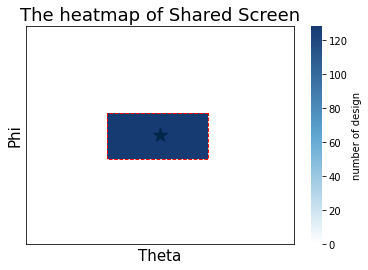

In [8]:
blue_dashcolor = '#0a234a'
### 畫全部 HeatMap
ax = sns.heatmap(heat,xticklabels=False, yticklabels=False,cmap=blues,cbar_kws={'label':'number of design'})
for _, spine in ax.spines.items():
    spine.set_visible(True)
# 147 21 (148, 168)
# 139 38 (140, 177)
    
# plt.plot([36*math.pi/180*100, 144*math.pi/180*100], [42*math.pi/180*100, 42*math.pi/180*100], color=blue_dashcolor, linestyle='--')
# plt.plot([36*math.pi/180*100, 144*math.pi/180*100], [138*math.pi/180*100, 138*math.pi/180*100], color=blue_dashcolor, linestyle='--')
# plt.plot([36*math.pi/180*100, 36*math.pi/180*100], [42*math.pi/180*100, 138*math.pi/180*100], color=blue_dashcolor, linestyle='--')
# plt.plot([144*math.pi/180*100, 144*math.pi/180*100], [42*math.pi/180*100, 138*math.pi/180*100], color=blue_dashcolor, linestyle='--')

rect = matplotlib.patches.Rectangle((139, 147), 38, 21, linewidth=1, edgecolor='r', linestyle='dashed', facecolor='none')
ax.add_patch(rect)

plt.xlim(314, 0)
plt.scatter(157, 157, marker='*', color='#00264a', s=210, label='Center Eye') 

plt.xlim(207,107)
plt.ylim(207,107)
#plt.legend()
plt.xlabel("Theta", fontsize=15)
plt.ylabel("Phi", fontsize=15)
plt.title("The heatmap of Shared Screen", fontsize=18)